In [4]:
# imports
import numpy as np

from commstools.core import Signal
from commstools.impairments import add_awgn
from commstools.plotting import filter_response


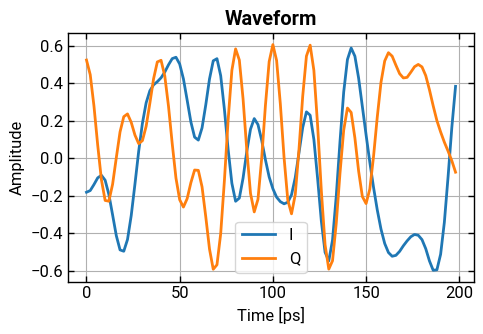

,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation Scheme,QAM
3,Modulation Order,16
4,Symbol Rate,100.00 GBaud
5,Bit Rate,400.00 Gbps
6,Sampling Rate,500.00 GHz
7,Samples Per Symbol,5.00
8,Pulse Shape,RRC
9,Duration,10.00 µs


In [ ]:
symbol_rate = 100e9
sampling_rate = 500e9
sps = int(sampling_rate / symbol_rate)

sig_4qam = Signal.qam(
    order=16,
    num_symbols=1_000_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="rrc",
    seed=42,
)
sig_4qam.plot_symbols(num_symbols=20, show=True)
sig_4qam.print_info()


In [11]:
sig_4qam.to("gpu")
# sig_4qam.backend


Signal(samples=array([-0.18124164+0.52290176j, -0.17237812+0.4451409j ,
       -0.1403986 +0.27862299j, ..., -0.38172534-0.28507622j,
       -0.2121085 -0.16154402j, -0.05426482-0.05348785j], shape=(5000000,)), sampling_rate=500000000000.0, symbol_rate=100000000000.0, modulation_scheme='QAM', modulation_order=16, source_symbols=array([-1.+3.j, -1.-1.j, -3.+1.j, ..., -1.-1.j,  1.-3.j, -3.-3.j],
      shape=(1000000,)), pulse_shape='rrc', spectral_domain='BASEBAND', physical_domain='DIG', center_frequency=0, digital_frequency_offset=0, filter_span=10, rrc_rolloff=0.35, rc_rolloff=0.35, gaussian_bt=0.3, smoothrect_bt=1.0)

In [12]:
jsamples = sig_4qam.export_samples_to_jax()


In [13]:
jsamples.device


CudaDevice(id=0)

In [6]:
import jax

cpu_device = jax.devices("cpu")[0]
jsamples = jax.device_put(jsamples, cpu_device)
jsamples.device


CpuDevice(id=0)

In [7]:
jsamples = jsamples.at[0].set(10)


In [8]:
sig_4qam.update_samples_from_jax(jsamples)


Signal(samples=array([10.        +0.j        , -0.17370631+0.44857076j,
       -0.1414804 +0.28076982j, ...,  0.3758503 -0.40883106j,
        0.21838324-0.24721251j,  0.0644929 -0.07833857j],
      shape=(500000,), dtype=complex64), sampling_rate=500000000000.0, symbol_rate=100000000000.0, modulation_scheme='QAM', modulation_order=16, source_bits=array([0, 1, 1, ..., 0, 0, 0], shape=(400000,)), pulse_shape='rrc', pulse_params={'filter_span': 10, 'rrc_rolloff': 0.35, 'rc_rolloff': 0.35, 'smoothrect_bt': 1.0, 'gaussian_bt': 0.3}, spectral_domain='BASEBAND', physical_domain='DIG', center_frequency=0, digital_frequency_offset=0, metadata={})

In [9]:
sig_4qam.print_info()


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation Scheme,QAM
3,Modulation Order,16
4,Symbol Rate,100.00 GBaud
5,Bit Rate,400.00 Gbps
6,Sampling Rate,500.00 GHz
7,Samples Per Symbol,5.00
8,Pulse Shape,RRC
9,Duration,1.00 µs


2025-12-21 17:34:49 [INFO] [commstools/plotting.py] Generating time-domain plot.


(<Figure size 500x350 with 1 Axes>,
 <Axes: title={'center': 'Waveform'}, xlabel='Time [ps]', ylabel='Amplitude'>)

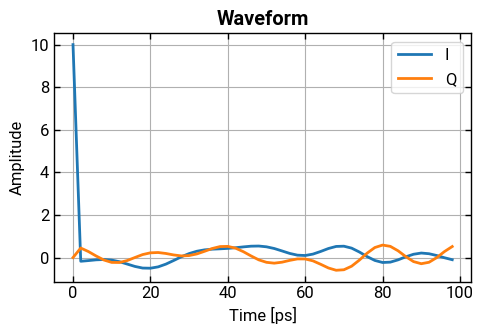

In [10]:
sig_4qam.plot_symbols(num_symbols=10)
